<a href="https://colab.research.google.com/github/iauh23/Instagram-Reach-Analysis/blob/main/Instagram_reach_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import the pyplot module for plotting functions
import seaborn as sns # Import seaborn for the histplot function

In [ ]:
data= pd.read_csv("Instagram data.csv", encoding='latin1')
print(data.head(220))

     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

In [ ]:
cleaned_data= data.dropna()

In [ ]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None


In [ ]:
print(cleaned_data.describe())

        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

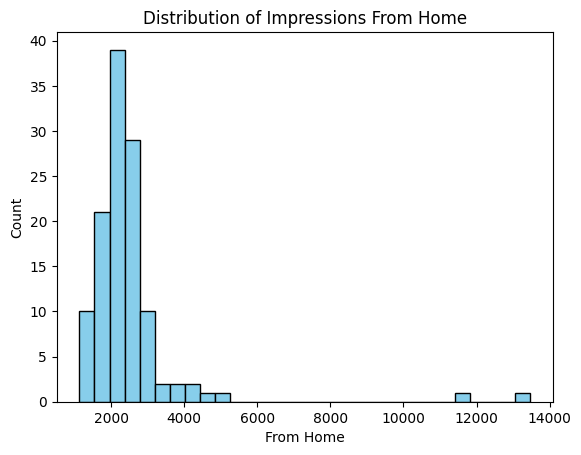

In [ ]:
#If it shows int64 or float64 → The data is numerical (use a histogram).
#If it shows object or category → The data is categorical (use a bar chart)
plt.xlabel("From Home")
plt.ylabel("Count")
plt.title("Distribution of Impressions From Home")
plt.hist(data["From Home"], bins=30, color="skyblue", edgecolor="black")

plt.show()

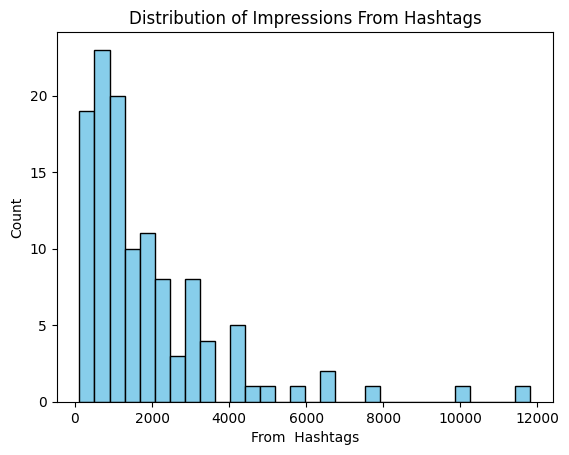

In [ ]:
plt.xlabel("From  Hashtags")
plt.ylabel("Count")
plt.title("Distribution of Impressions From Hashtags")
plt.hist(data["From Hashtags"], bins=30, color="skyblue", edgecolor="black")

plt.show()

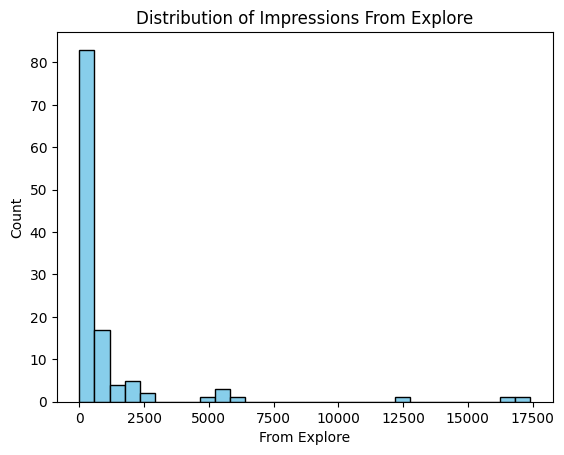

In [ ]:
plt.xlabel("From Explore")
plt.ylabel("Count")
plt.title("Distribution of Impressions From Explore")
plt.hist(data["From Explore"], bins=30, color="skyblue", edgecolor="black")

plt.show()

In [ ]:
home_impression_percentage = (data["From Home"].sum() / data["Impressions"].sum()) * 100
hashtags_impression_percentage = (data["From Hashtags"].sum() / data["Impressions"].sum()) * 100
explore_impression_percentage = (data["From Explore"].sum() / data["Impressions"].sum()) * 100

print(home_impression_percentage)
print(hashtags_impression_percentage)
print(explore_impression_percentage)




43.40451548745903
33.09108320135538
18.900813966336415


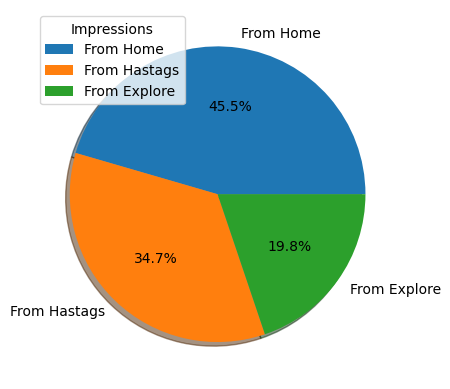

In [ ]:
array= np.array([home_impression_percentage,
              hashtags_impression_percentage,
              explore_impression_percentage])
mylabel = np.array(["From Home", "From Hastags", "From Explore"])

plt.pie(array, labels=mylabel, shadow=True, autopct="%1.1f%%")
plt.legend(title="Impressions")
plt.show()

In [ ]:

fig= px.scatter(data, x= "Impressions", y="Likes", trendline="ols", size="Likes",
                title = "Relationship Between Likes and Impressions")
fig.show()

In [ ]:
fig= px.scatter(data, x = "Impressions", y = "Comments", size='Likes', trendline = 'lowess',
                     title = "Relationship between Impressions and number of comments")
fig.show()

In [ ]:
fig= px.scatter(data, x = 'Impressions', y = 'Shares',
           size = "Shares",  trendline = 'lowess',
           title = 'Relationship between Impressions and number of comments')
fig.show()


In [ ]:
fig= px.scatter(data, x = "Profile Visits", y = "Follows",
          trendline = 'lowess', title = "Relationship Between Profile Visits and Followers Gained")
fig.show()

In [ ]:
correlation = data.select_dtypes(include=['number']).corr()
print(correlation['Impressions'].sort_values(ascending=False))



Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [ ]:
conversion_rate = (data["Follows"].sum()/data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668
